# Visualize Firewall Log

In [6]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import networkx as nx

# Suppress DeprecationWarning from pandas
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
normal_file_relative_path = '../data/Edge-IIoTset dataset/Normal traffic/Heart_Rate/Heart_Rate.csv'

normal_file = os.path.abspath(normal_file_relative_path)
# Read the CSV file
firewall_log = pd.read_csv(normal_file)

# Display the data
firewall_log.head(5)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 02:39:39.986982000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 02:39:39.987068000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
2,2021 02:39:40.000498000,192.168.3.18,192.168.3.12,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
3,2021 02:39:40.000575000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 02:39:40.001196000,192.168.3.12,192.168.3.18,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


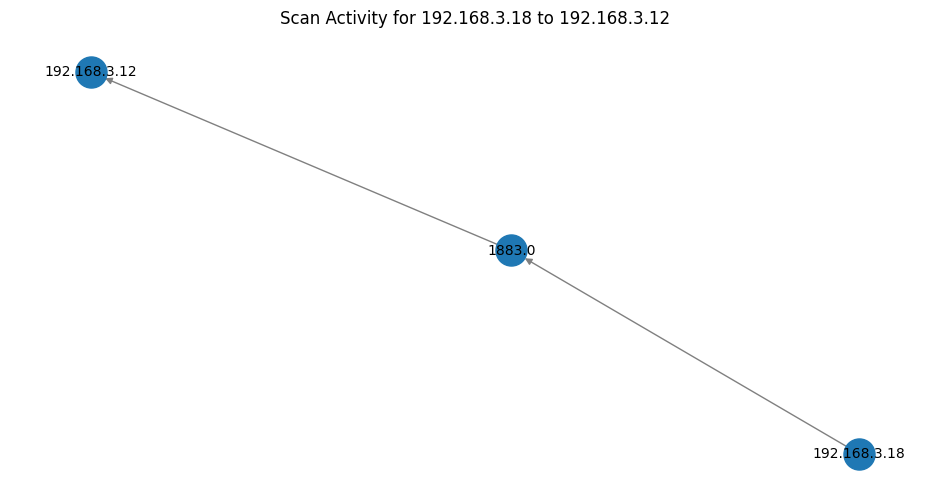

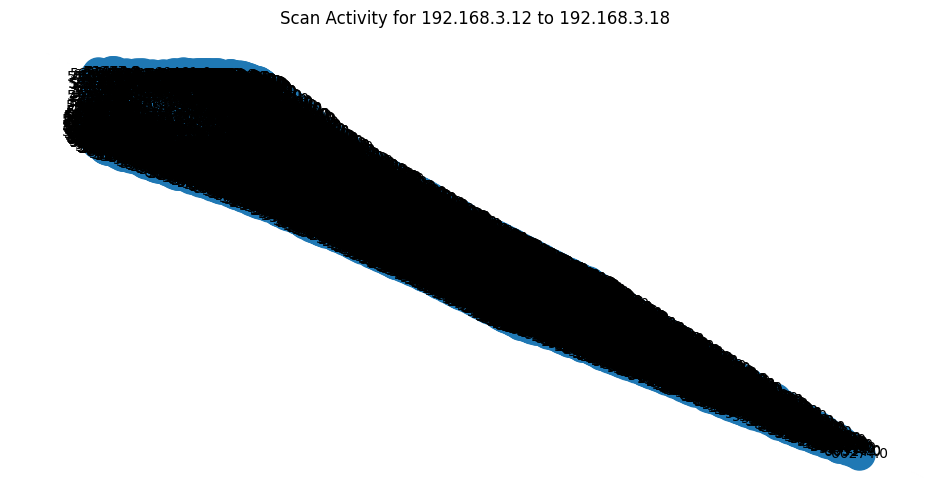

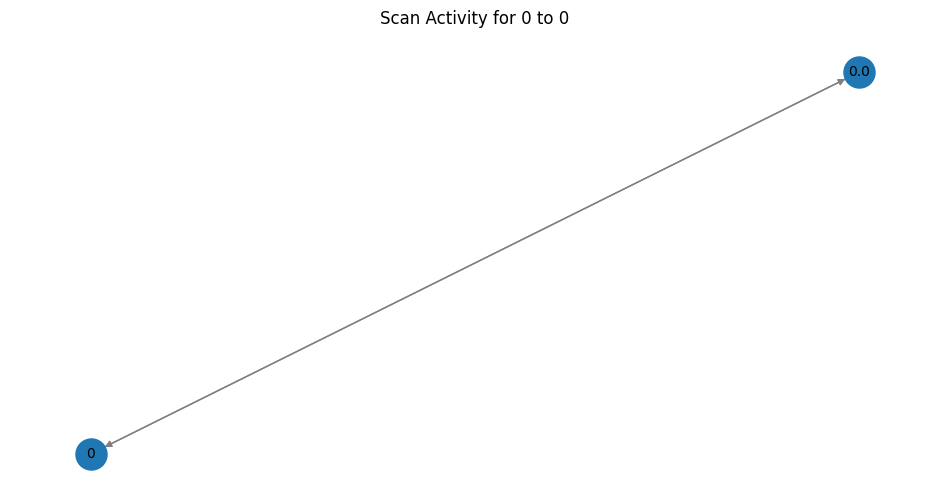

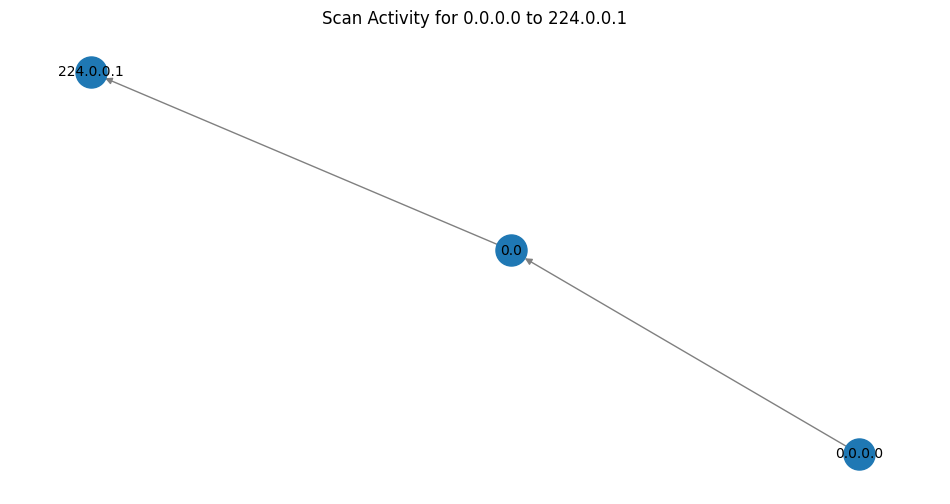

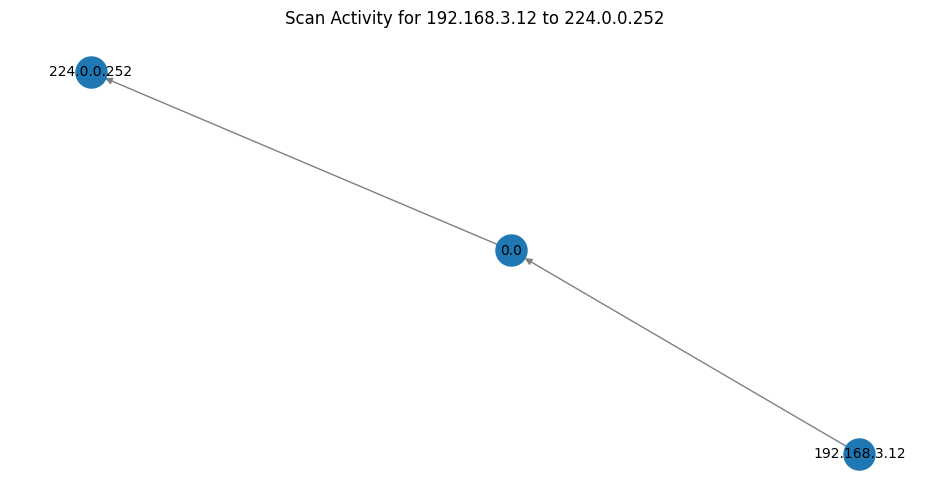

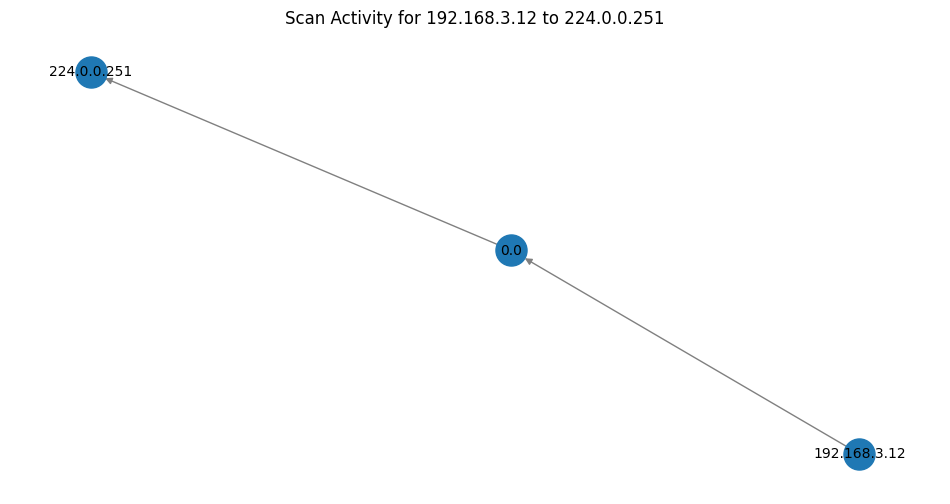

In [8]:
# Get unique source-destination pairs
unique_pairs = firewall_log[['ip.src_host', 'ip.dst_host']].drop_duplicates()

# Iterate over each pair
for _, pair in unique_pairs.iterrows():
    # Create a new figure and graph for each pair
    plt.figure(figsize=(12, 6))
    graph = nx.DiGraph()

    src_host = pair['ip.src_host']
    dst_host = pair['ip.dst_host']
    
    # Filter the data for the specific source-destination pair
    filtered_data = firewall_log[(firewall_log['ip.src_host'] == src_host) & (firewall_log['ip.dst_host'] == dst_host)]
    
    # Add edges from source host to destination ports
    for port in filtered_data['tcp.dstport'].unique():
        graph.add_edge(src_host, port)  # Add edge from source host to destination host
        graph.add_edge(port, dst_host)  # Add edge from destination host to destination port

    # Plot the graph with vertical alignment
    pos = nx.spring_layout(graph, seed=42)
    pos = {node: (x, -y) for node, (x, y) in pos.items()}
    nx.draw_networkx(graph, pos, with_labels=True, node_size=500, font_size=10, edge_color='gray')
    plt.title(f'Scan Activity for {src_host} to {dst_host}')
    plt.axis('off')
    plt.show()